In [24]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/amazon-fine-food-reviews/hashes.txt
/kaggle/input/amazon-fine-food-reviews/Reviews.csv
/kaggle/input/amazon-fine-food-reviews/database.sqlite


In [25]:
df=pd.read_csv(r'/kaggle/input/amazon-fine-food-reviews/Reviews.csv')

In [26]:
df

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
...,...,...,...,...,...,...,...,...,...,...
568449,568450,B001EO7N10,A28KG5XORO54AY,Lettie D. Carter,0,0,5,1299628800,Will not do without,Great for sesame chicken..this is a good if no...
568450,568451,B003S1WTCU,A3I8AFVPEE8KI5,R. Sawyer,0,0,2,1331251200,disappointed,I'm disappointed with the flavor. The chocolat...
568451,568452,B004I613EE,A121AA1GQV751Z,"pksd ""pk_007""",2,2,5,1329782400,Perfect for our maltipoo,"These stars are small, so you can give 10-15 o..."
568452,568453,B004I613EE,A3IBEVCTXKNOH,"Kathy A. Welch ""katwel""",1,1,5,1331596800,Favorite Training and reward treat,These are the BEST treats for training and rew...


In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
df.head(1)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...


In [29]:
df.isnull().sum()
df=df.dropna()

In [30]:
df.duplicated().any()

False

In [31]:
df.shape

(568401, 10)

In [32]:
df=df.sample(5000)

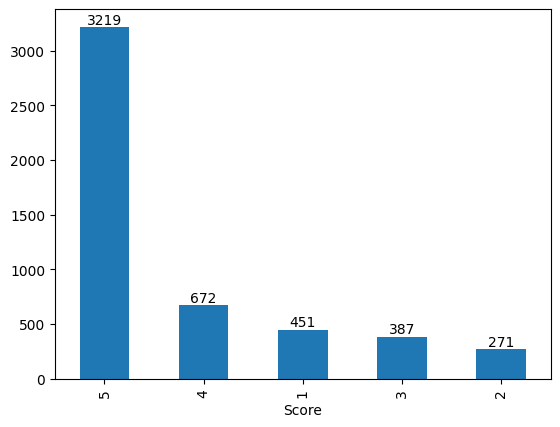

In [33]:
ax=df['Score'].value_counts().sort_values(ascending=False).plot(kind='bar')
for bars in ax.containers:
    ax.bar_label(bars)

In [34]:
df.isnull().sum()

Id                        0
ProductId                 0
UserId                    0
ProfileName               0
HelpfulnessNumerator      0
HelpfulnessDenominator    0
Score                     0
Time                      0
Summary                   0
Text                      0
dtype: int64

In [35]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

In [36]:
def tokenize(word):
    return word_tokenize(word)

In [37]:
sw=stopwords.words('english')

In [38]:
from nltk import pos_tag

In [39]:
!pip install tqdm
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

In [40]:
sia=SentimentIntensityAnalyzer()

In [41]:
sia.polarity_scores("I am so happy")

{'neg': 0.0, 'neu': 0.334, 'pos': 0.666, 'compound': 0.6115}

In [42]:
sia.polarity_scores('This is the worst thing ever')

{'neg': 0.451, 'neu': 0.549, 'pos': 0.0, 'compound': -0.6249}

In [43]:
example=df['Text'].sample(1)

In [44]:
example

317711    I love this apple cider for a sweet treat with...
Name: Text, dtype: object

In [45]:
sia.polarity_scores(example.to_string())

{'neg': 0.0, 'neu': 0.377, 'pos': 0.623, 'compound': 0.872}

In [46]:
res={}
for i,row in tqdm(df.iterrows(),total=len(df)):
    text=row['Text']
    my_id=row['Id']
    res[my_id]=sia.polarity_scores(text)

  0%|          | 0/5000 [00:00<?, ?it/s]

In [47]:
res

{360910: {'neg': 0.052, 'neu': 0.62, 'pos': 0.328, 'compound': 0.9928},
 279498: {'neg': 0.081, 'neu': 0.586, 'pos': 0.333, 'compound': 0.8283},
 397819: {'neg': 0.079, 'neu': 0.809, 'pos': 0.112, 'compound': 0.5894},
 202421: {'neg': 0.078, 'neu': 0.78, 'pos': 0.142, 'compound': 0.6605},
 478811: {'neg': 0.116, 'neu': 0.755, 'pos': 0.128, 'compound': 0.0},
 188441: {'neg': 0.05, 'neu': 0.732, 'pos': 0.218, 'compound': 0.9838},
 4643: {'neg': 0.154, 'neu': 0.746, 'pos': 0.1, 'compound': -0.3919},
 312883: {'neg': 0.0, 'neu': 0.621, 'pos': 0.379, 'compound': 0.9891},
 506833: {'neg': 0.0, 'neu': 0.839, 'pos': 0.161, 'compound': 0.902},
 539071: {'neg': 0.0, 'neu': 0.742, 'pos': 0.258, 'compound': 0.8468},
 304063: {'neg': 0.0, 'neu': 0.537, 'pos': 0.463, 'compound': 0.937},
 70862: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 117306: {'neg': 0.068, 'neu': 0.774, 'pos': 0.158, 'compound': 0.4404},
 244825: {'neg': 0.042, 'neu': 0.704, 'pos': 0.253, 'compound': 0.7901},
 94360:

In [48]:
data=pd.DataFrame(res).T

In [49]:
data=data.reset_index().rename(columns={'index':'Id'})

In [50]:
data=data.merge(df,how='left',on='Id')

In [51]:
data

,Id,neg,neu,pos,compound,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,360910,0.052,0.620,0.328,0.9928,B000H0ZJIG,A30ITU02ES1FIZ,Jessica Rae Vernon,0,0,5,1336867200,Good til the last treat,"Usually I don't write reviews, but who really ..."
1,279498,0.081,0.586,0.333,0.8283,B000GZSDPS,A3ANJX39EZHKMC,"Nina P. Kelly ""menoo""",0,0,5,1325808000,So happy to have it,We LOVE the IM Health soy nut butter. It's ta...
2,397819,0.079,0.809,0.112,0.5894,B0014GP4WS,A2QZCRYG2UWLLT,dave,1,1,5,1312761600,Oh'Henry,I live in St. Louis and wanted to purchase Oh'...
3,202421,0.078,0.780,0.142,0.6605,B0045PB398,A2BK48O5BPV7Y,Rosie,0,1,3,1302912000,Tassimo chai tea,I've gotten a few deliveries now and all were ...
4,478811,0.116,0.755,0.128,0.0000,B004H3V1SQ,A1WOGCPVZHM4LJ,denise-nh,0,0,5,1348012800,love this and it worked for me.,Bought this juice at a store. Painful arthrit...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,401752,0.028,0.795,0.177,0.9698,B000BLMWCM,AL27LH98TEBMI,D. Gardner,3,3,5,1245974400,Great Product,I have used Artemis food for over a 6 month pe...
4996,324849,0.057,0.783,0.159,0.8313,B000E65ORY,A2ZE5ICI6LWAZ0,"Debra Schiff ""http://hereandthere123.blogspot...",1,1,5,1242518400,An excellent cleansing tea,"This creamy, vanilla-flavored tea works really..."
4997,208610,0.077,0.871,0.052,-0.3178,B0000WATVI,A33JHVWWV0LUDH,"Nancy L. Webster ""nlwebster79102""",0,0,3,1268179200,Bland,I was so excited to find this mix and made it ...
4998,21464,0.032,0.689,0.278,0.9499,B002QWP89S,A1MYSCDZ4UW21P,"Nancy J. Svensen ""Buddy's Mom""",0,0,5,1274227200,Greenies - Buddy's #1 Treat,Greenies Bones are the best treat my dog of 11...


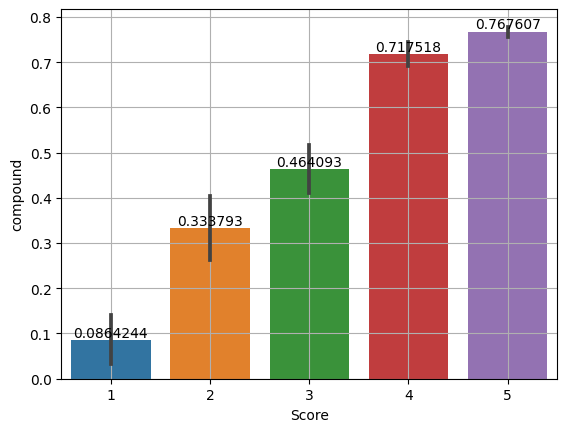

In [52]:
ax=sns.barplot(data=data,x='Score',y='compound')
for bars in ax.containers:
    ax.bar_label(bars)
plt.grid()

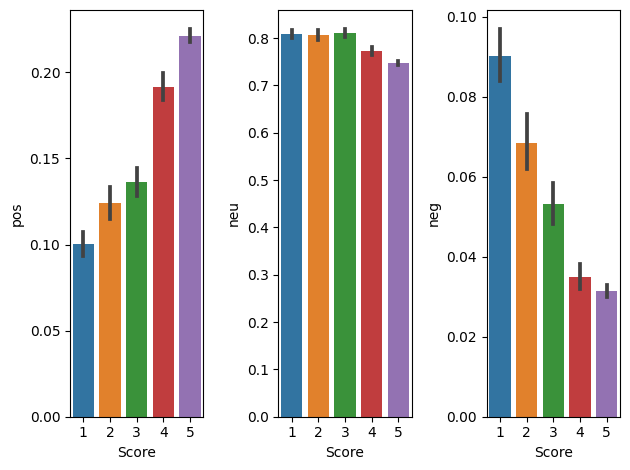

In [53]:
fig,axes=plt.subplots(1,3)
sns.barplot(data=data,x='Score',y='pos',ax=axes[0])
sns.barplot(data=data,x='Score',y='neu',ax=axes[1])
sns.barplot(data=data,x='Score',y='neg',ax=axes[2])
plt.tight_layout()
plt.show()


In [54]:
!pip install transformers

In [55]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [56]:
from transformers import RobertaConfig, RobertaModel

configuration = RobertaConfig()


model = RobertaModel(configuration)


configuration = model.config

In [57]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

config.json:   0%|          | 0.00/747 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/150 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/499M [00:00<?, ?B/s]

/opt/conda/lib/python3.10/site-packages/torch/_utils.py:831: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return self.fget.__get__(instance, owner)()


In [58]:
encoded_text = tokenizer(example.to_string(), return_tensors='pt')
output = model(**encoded_text)
scores = output[0][0].detach().numpy()
scores = softmax(scores)
scores_dict = {
    'roberta_neg' : scores[0],
    'roberta_neu' : scores[1],
    'roberta_pos' : scores[2]
}
print(scores_dict)

{'roberta_neg': 0.0013344429, 'roberta_neu': 0.011452613, 'roberta_pos': 0.98721296}


In [59]:
def polarity_scores_roberta(example):
    encoded_text = tokenizer(example, return_tensors='pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {
        'roberta_neg' : scores[0],
        'roberta_neu' : scores[1],
        'roberta_pos' : scores[2]
    }
    return scores_dict

In [ ]:
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    try:
        text = row['Text']
        myid = row['Id']
        vader_result = sia.polarity_scores(text)
        vader_result_rename = {}
        for key, value in vader_result.items():
            vader_result_rename[f"vader_{key}"] = value
        roberta_result = polarity_scores_roberta(text)
        both = {**vader_result_rename, **roberta_result}
        res[myid] = both
    except RuntimeError:
        print(f'Broke for id {myid}')

  0%|          | 0/5000 [00:00<?, ?it/s]

Broke for id 169515
Broke for id 196434
Broke for id 477097
Broke for id 488062
Broke for id 60395
Broke for id 194111
Broke for id 305533
Broke for id 466181
Broke for id 434850
Broke for id 251202
Broke for id 112508
Broke for id 288292
Broke for id 341232
Broke for id 221486
Broke for id 295654
Broke for id 3788
Broke for id 247816
Broke for id 472804
Broke for id 56018
Broke for id 422068
Broke for id 407640
Broke for id 276018
Broke for id 441234
Broke for id 207567
Broke for id 336667
Broke for id 387213
Broke for id 216221
Broke for id 119678
Broke for id 126415
Broke for id 159549
Broke for id 110286
Broke for id 67250
Broke for id 508625
Broke for id 222282
Broke for id 104994
Broke for id 354391
Broke for id 260463
Broke for id 59665
Broke for id 421739


In [63]:
results_df = pd.DataFrame(res).T
results_df = results_df.reset_index().rename(columns={'index': 'Id'})
results_df = results_df.merge(df, how='left')

In [ ]:
sns.pairplot(data=results_df,
             vars=['vader_neg', 'vader_neu', 'vader_pos',
                  'roberta_neg', 'roberta_neu', 'roberta_pos'],
            hue='Score',
            palette='tab10')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 